# ML | Heart Disease Prediction Using Logistic Regression

* World Health Organization has estimated that four out of five cardiovascular disease (CVD) deaths are due to heart attacks. This whole research intends to pinpoint the ratio of patients who possess a good chance of being affected by CVD and also to predict the overall risk using Logistic Regression.

* What is Logistic Regression?
Logistic Regression is a statistical and machine-learning technique classifying records of a dataset based on the values of the input fields. It predicts a dependent variable based on one or more sets of independent variables to predict outcomes. It can be used both for binary classification and multi-class classification. To know more about it, click here.

## Heart Disease Prediction Using Logistic Regression

In [1]:
#Importing Necessary Libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

 # Data Preparation
 * The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [3]:
# loading data
data = pd.read_csv("framingham.csv")

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# investigating columns
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

TenYearCHD
0    3596
1     644
Name: count, dtype: int64


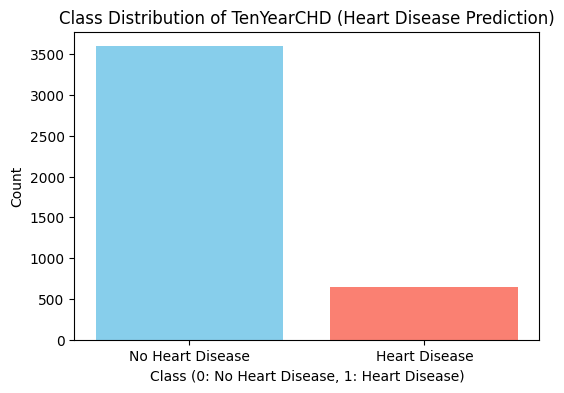

In [5]:
# investigation target column  imbalance
class_counts = data["TenYearCHD"].value_counts()
print(class_counts)

plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
plt.title("Class Distribution of TenYearCHD (Heart Disease Prediction)")
plt.xlabel("Class (0: No Heart Disease, 1: Heart Disease)")
plt.ylabel("Count")
plt.xticks(class_counts.index, ['No Heart Disease', 'Heart Disease'])
plt.show()



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
# checking missing values
data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [8]:
print(data["education"])
print(data["BPMeds"])
print(data["BMI"])
print(data["totChol"])
print(data["glucose"])

0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4235    2.0
4236    1.0
4237    2.0
4238    3.0
4239    3.0
Name: education, Length: 4240, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4235    NaN
4236    0.0
4237    0.0
4238    0.0
4239    0.0
Name: BPMeds, Length: 4240, dtype: float64
0       26.97
1       28.73
2       25.34
3       28.58
4       23.10
        ...  
4235    22.00
4236    19.16
4237    21.47
4238    25.60
4239    20.91
Name: BMI, Length: 4240, dtype: float64
0       195.0
1       250.0
2       245.0
3       225.0
4       285.0
        ...  
4235    248.0
4236    210.0
4237    269.0
4238    185.0
4239    196.0
Name: totChol, Length: 4240, dtype: float64
0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4235     86.0
4236      NaN
4237    107.0
4238     72.0
4239     80.0
Name: glucose, Length: 4240, dtype: float64


In [9]:
# Fill missing values in 'education' with the mode (most frequent value)
data['education'] = data['education'].fillna(data['education'].mode()[0])
print(data['education'].isnull().sum())
# Fill missing values in 'BPMeds' with the mean
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mean())
print(data['BPMeds'].isnull().sum())

# Fill missing values in 'BMI' with the mean
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
print(data['BMI'].isnull().sum())

# Fill missing values in 'totChol' with the mean
data['totChol'] = data['totChol'].fillna(data['totChol'].mean())
print(data['totChol'].isnull().sum())

# Fill missing values in 'glucose' with the mean
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())
print(data['glucose'].isnull().sum())


0
0
0
0
0


In [10]:
# checking duplicates
data.duplicated().sum()

0

In [11]:
# statistical data distribution
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4211.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4239.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.922462,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.025348,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#  Distribution of Variables

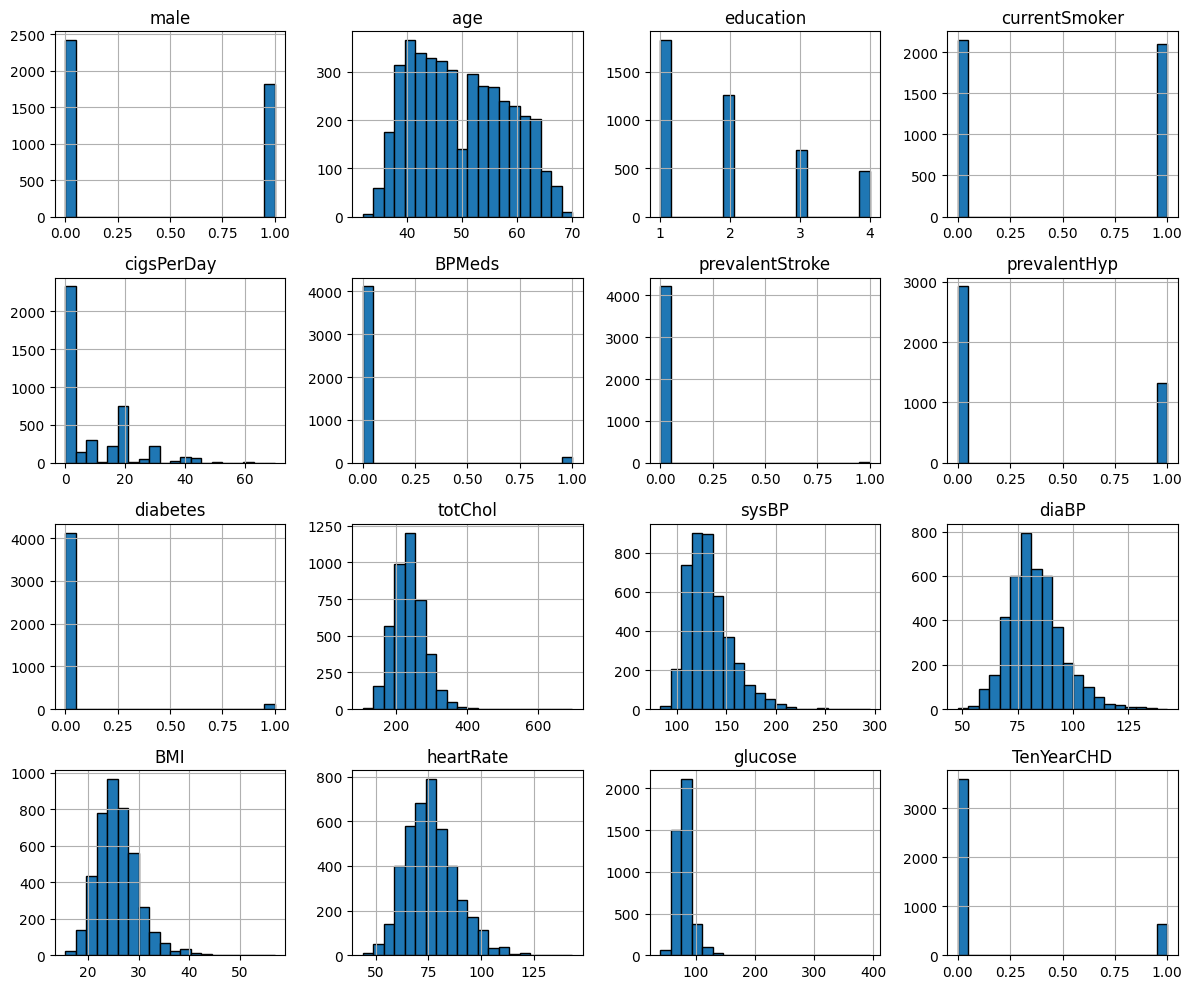

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


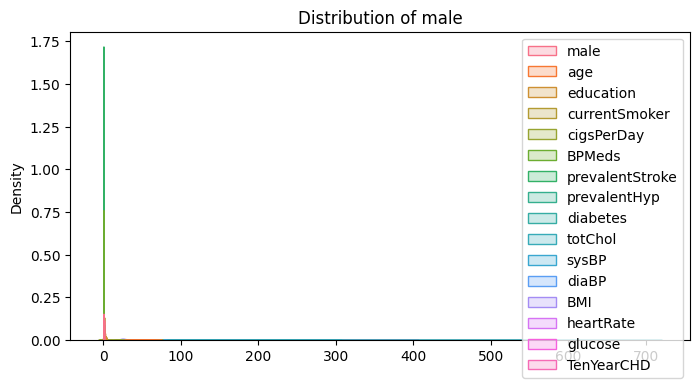

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


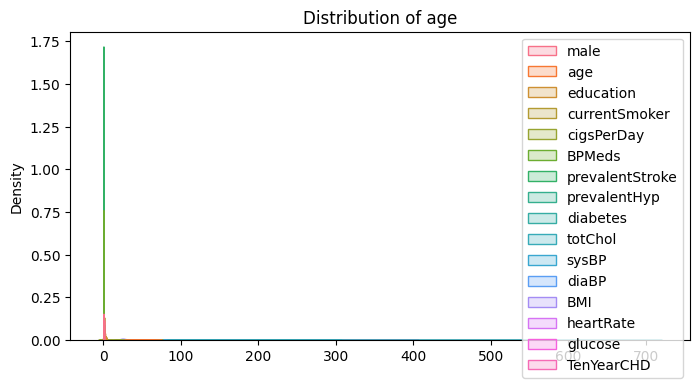

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


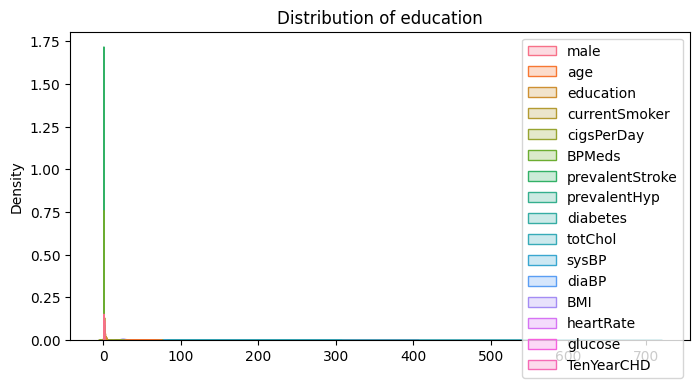

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


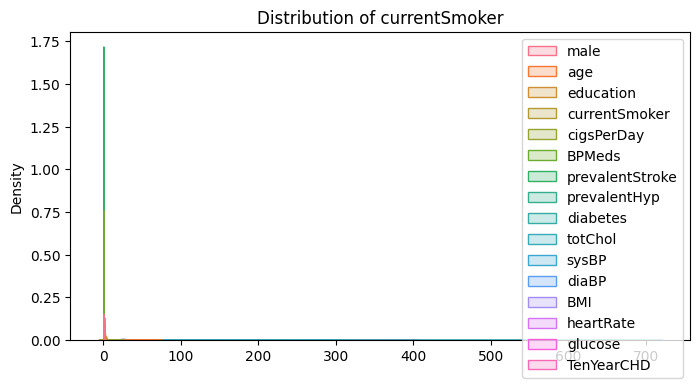

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


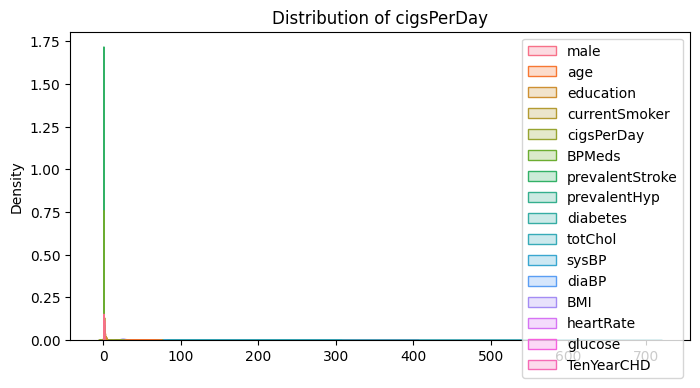

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


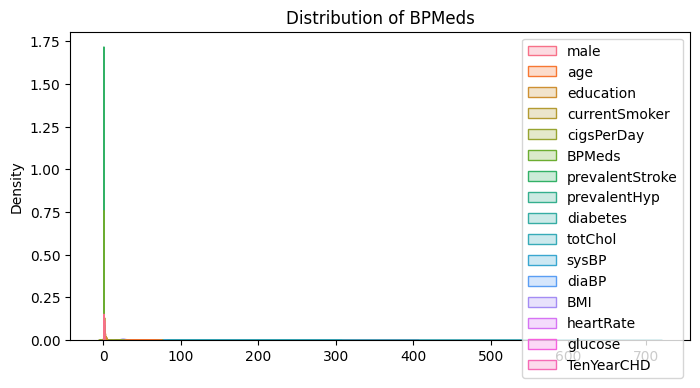

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


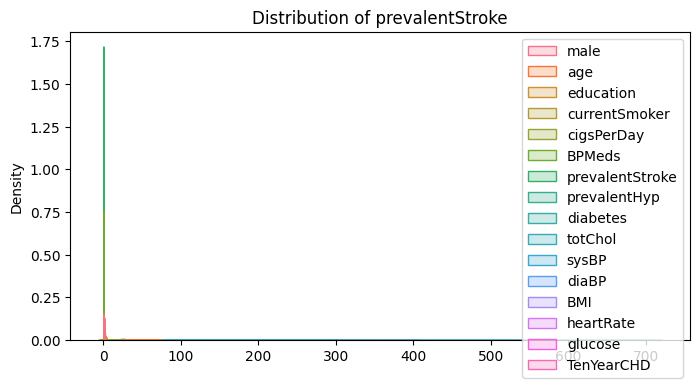

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


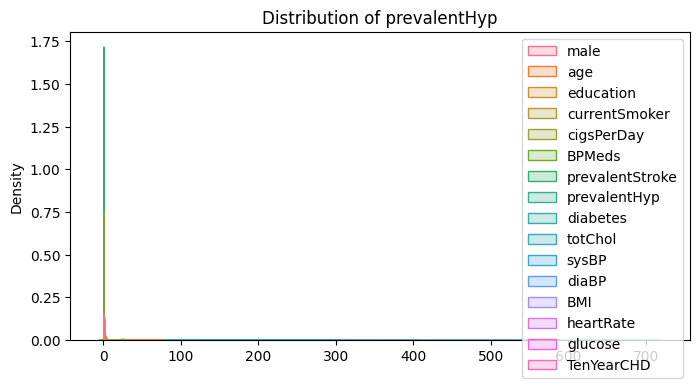

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


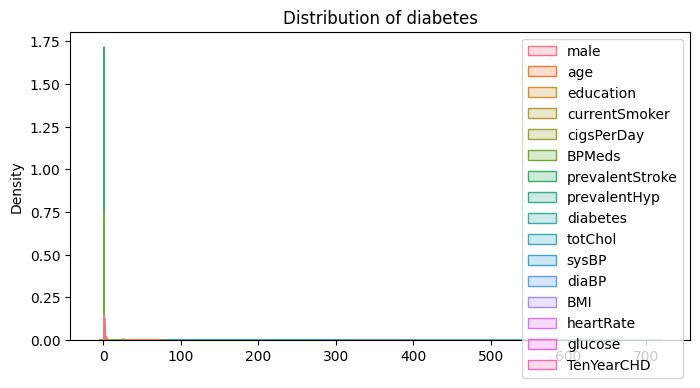

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


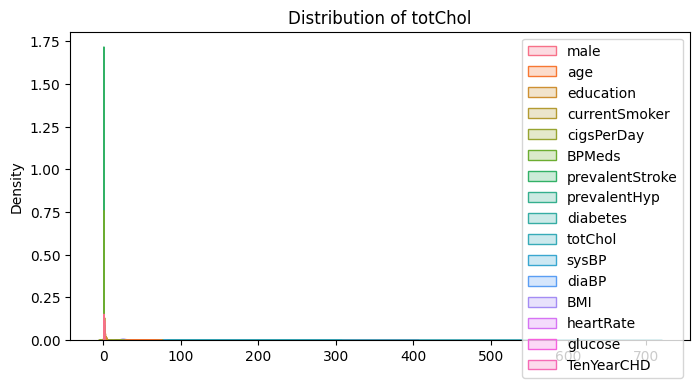

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


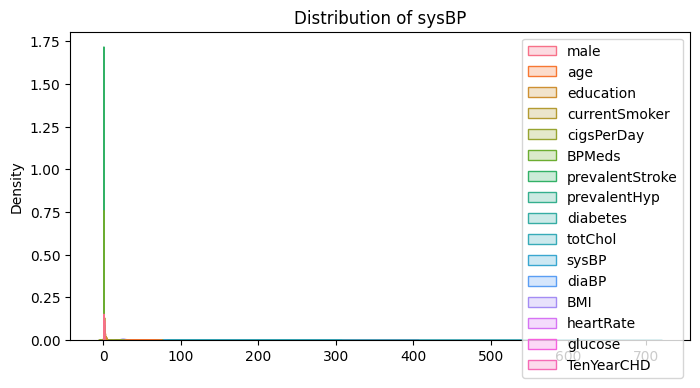

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


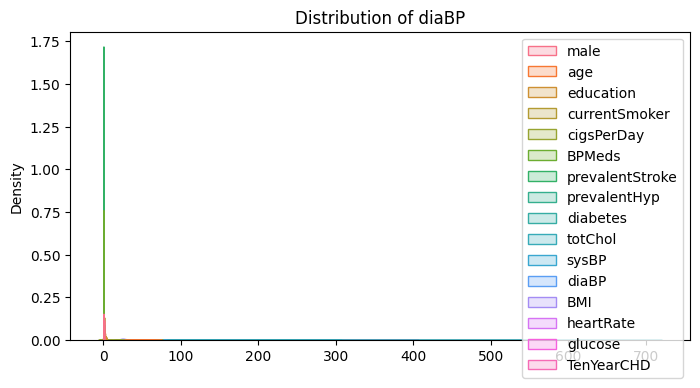

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


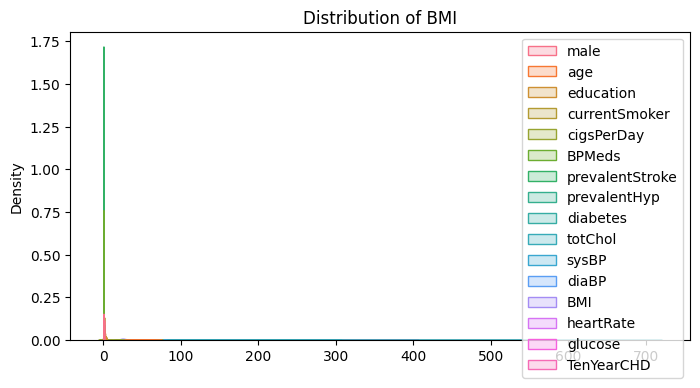

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


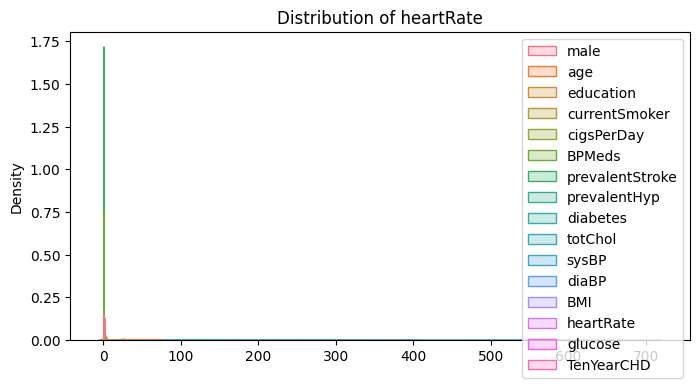

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


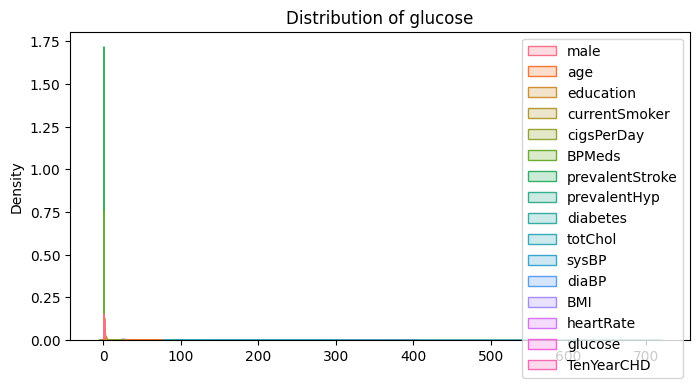

<ipython-input-12-f4a32dfda48f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


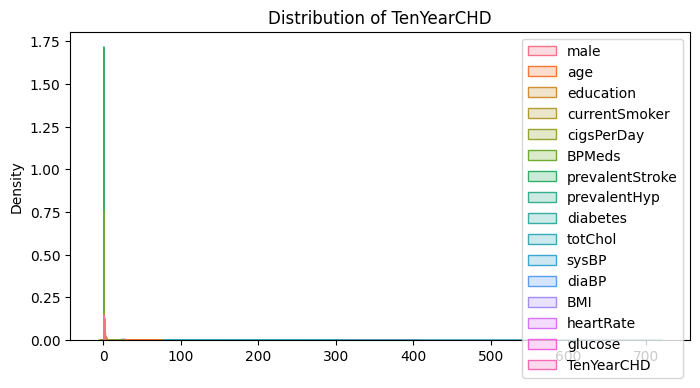

In [12]:

data.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.tight_layout()
plt.show()


for col in data:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data, shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Outlier Detection

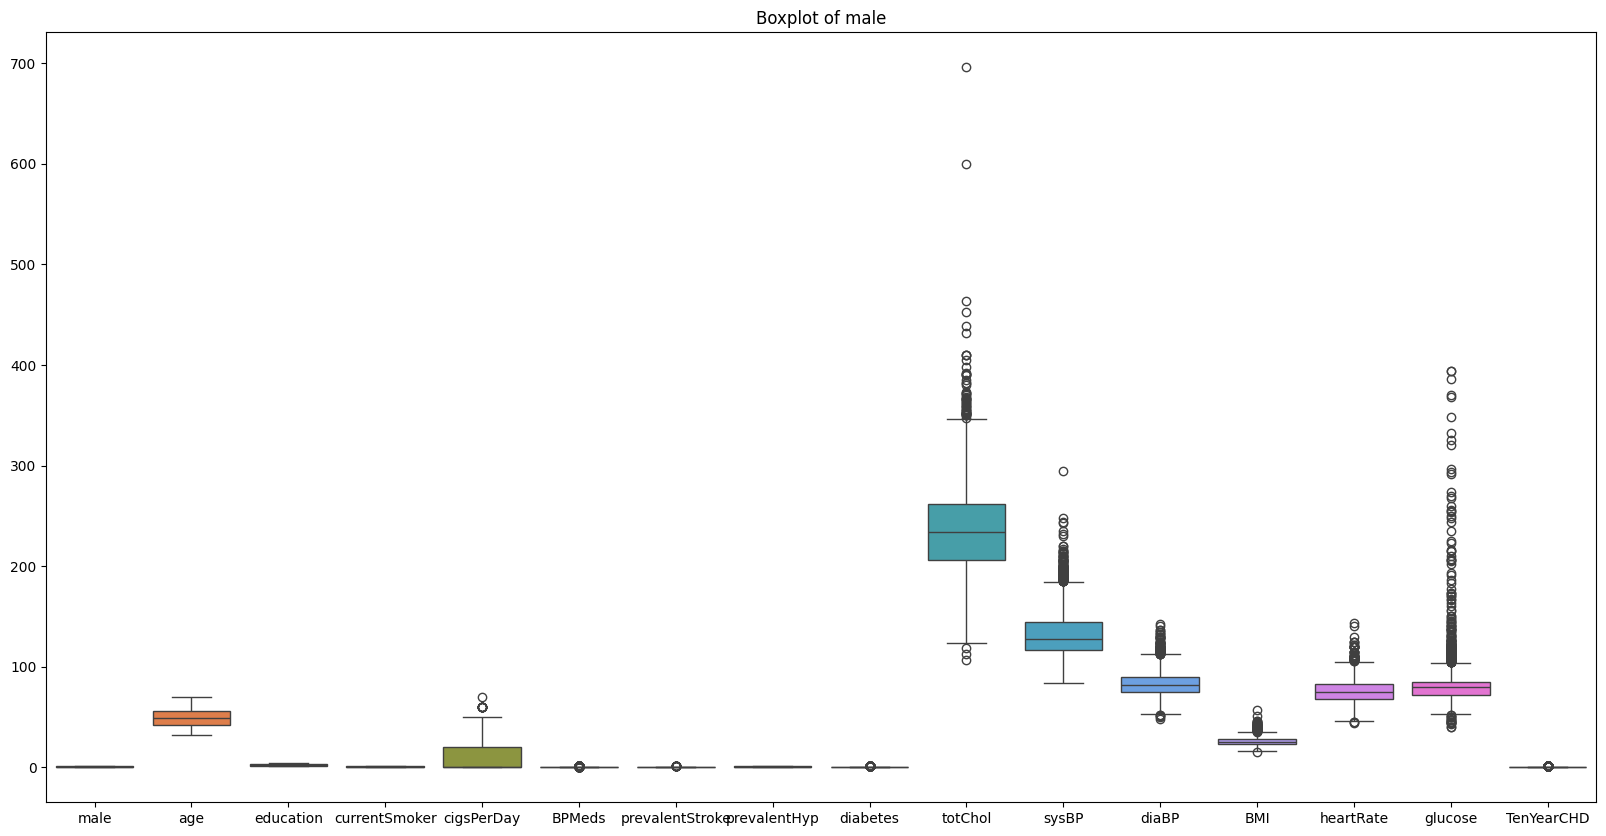

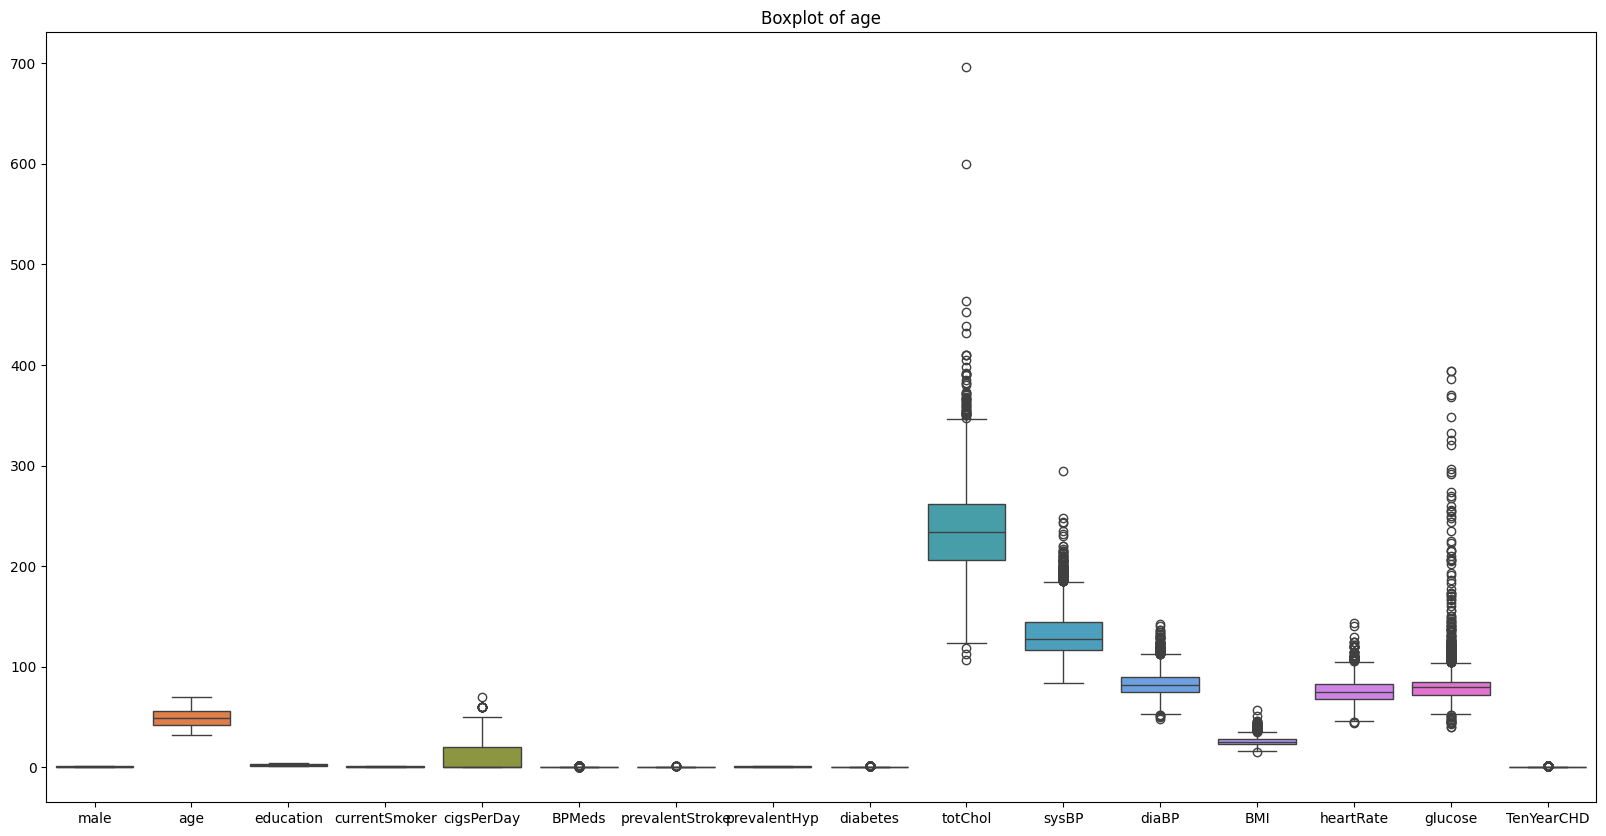

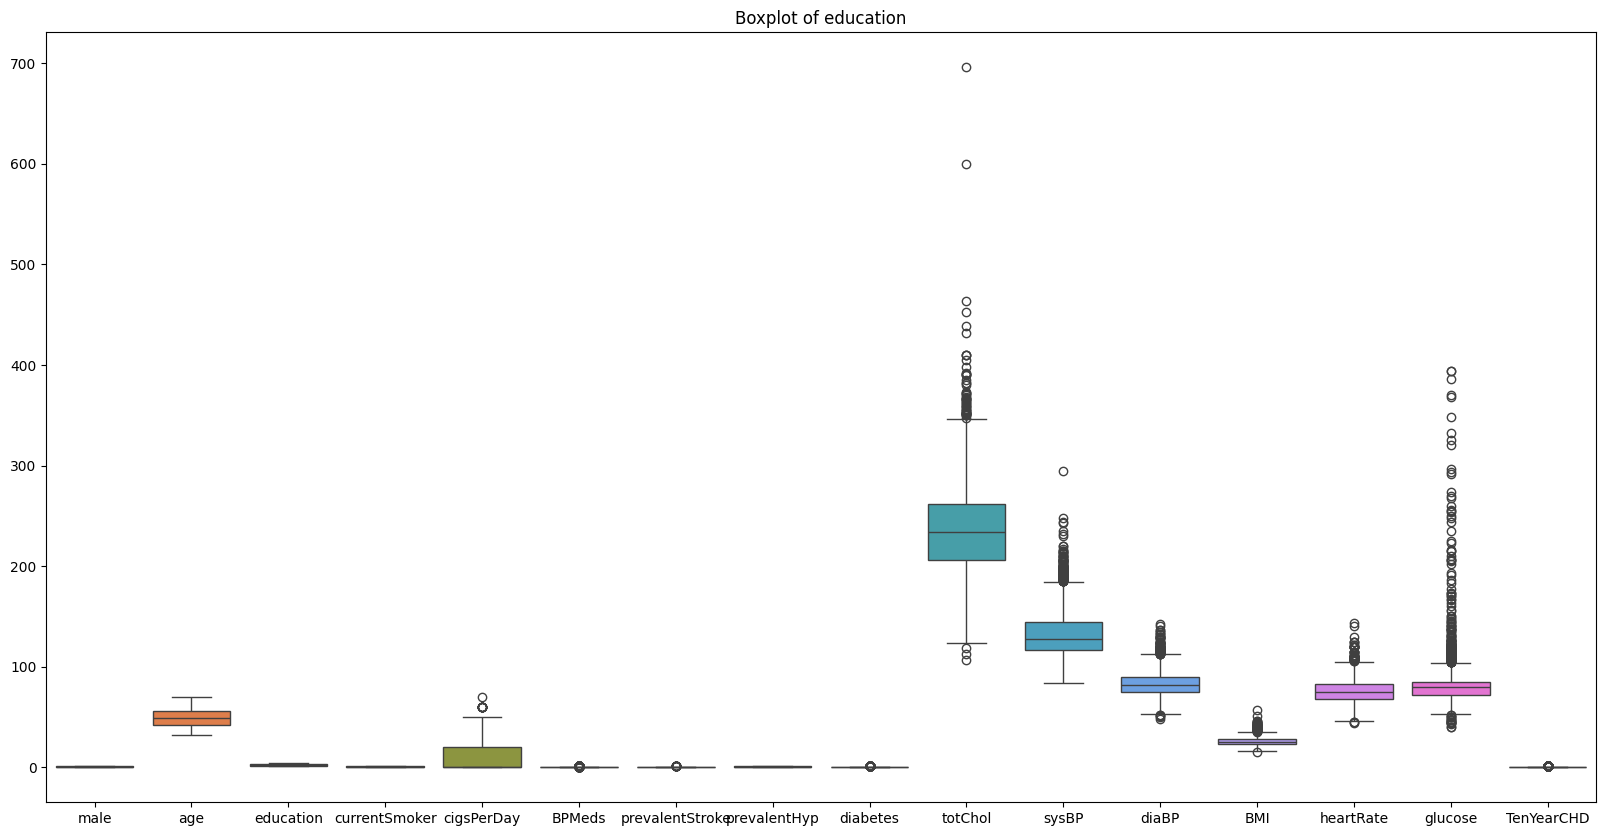

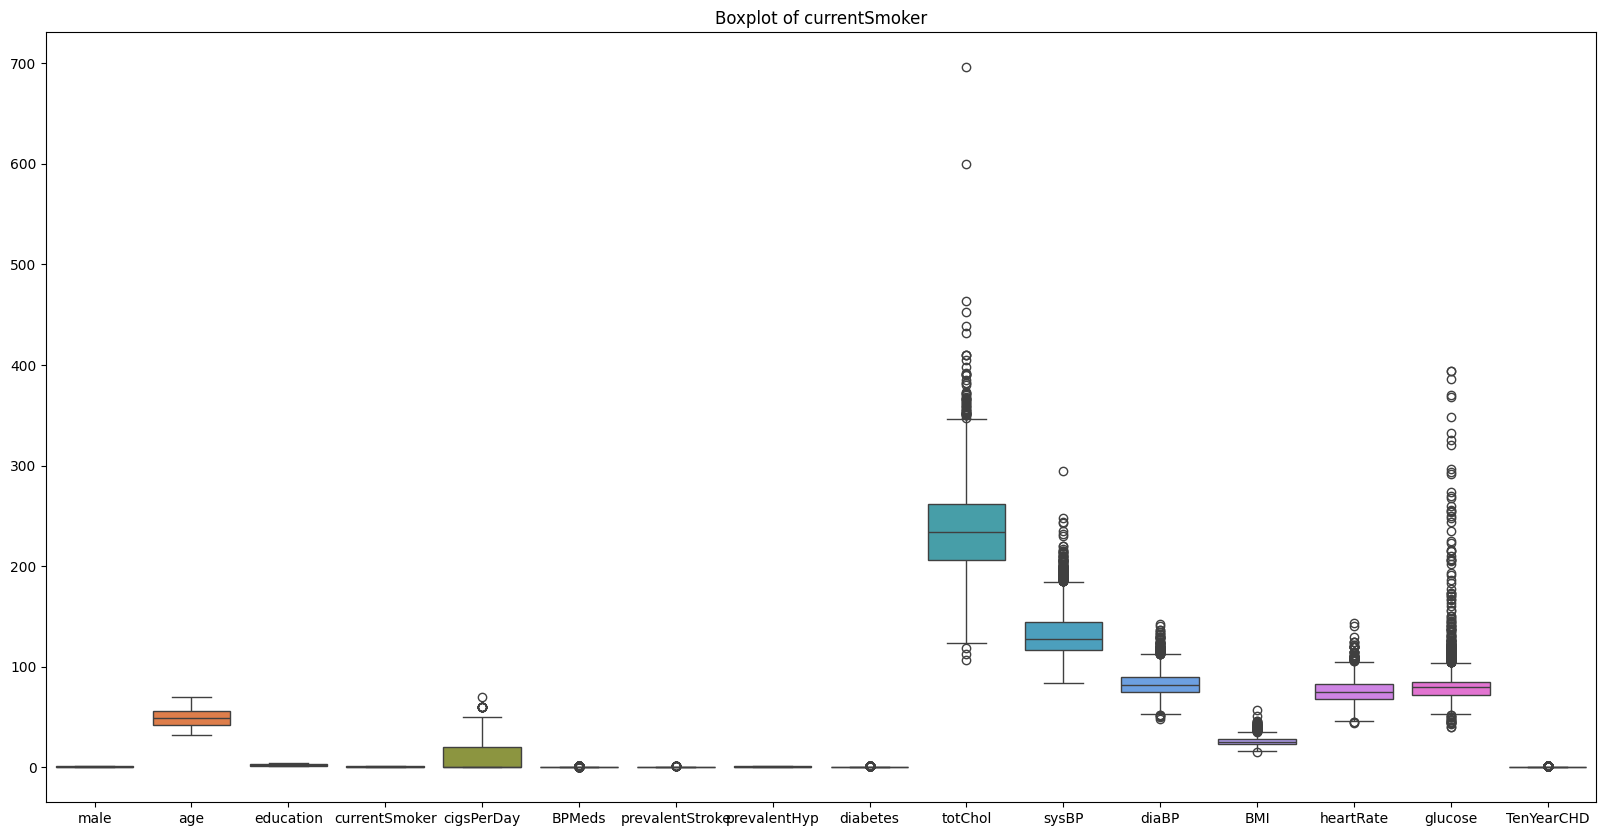

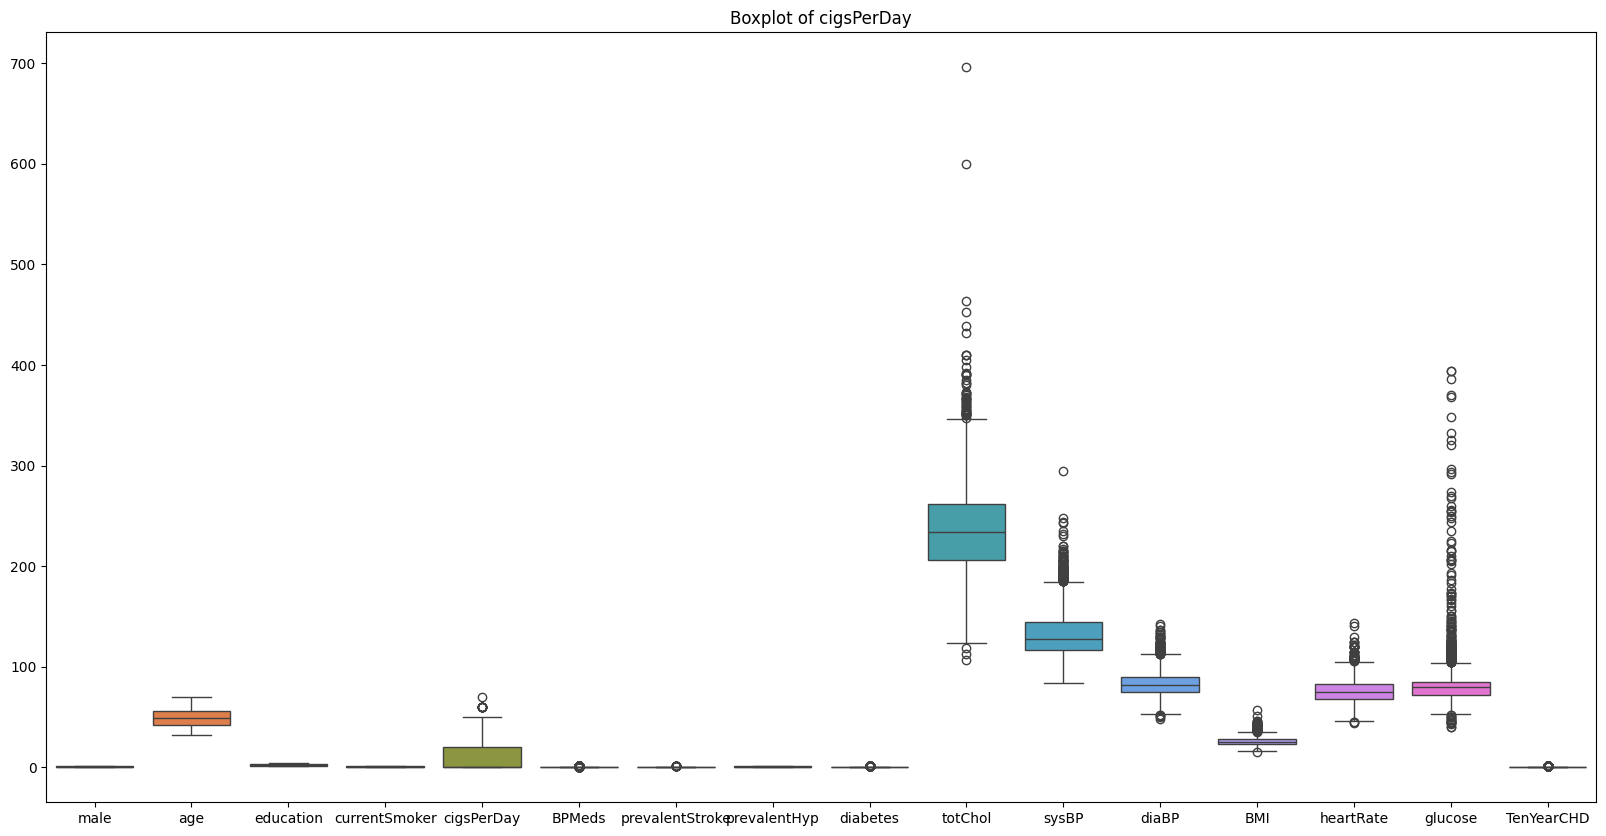

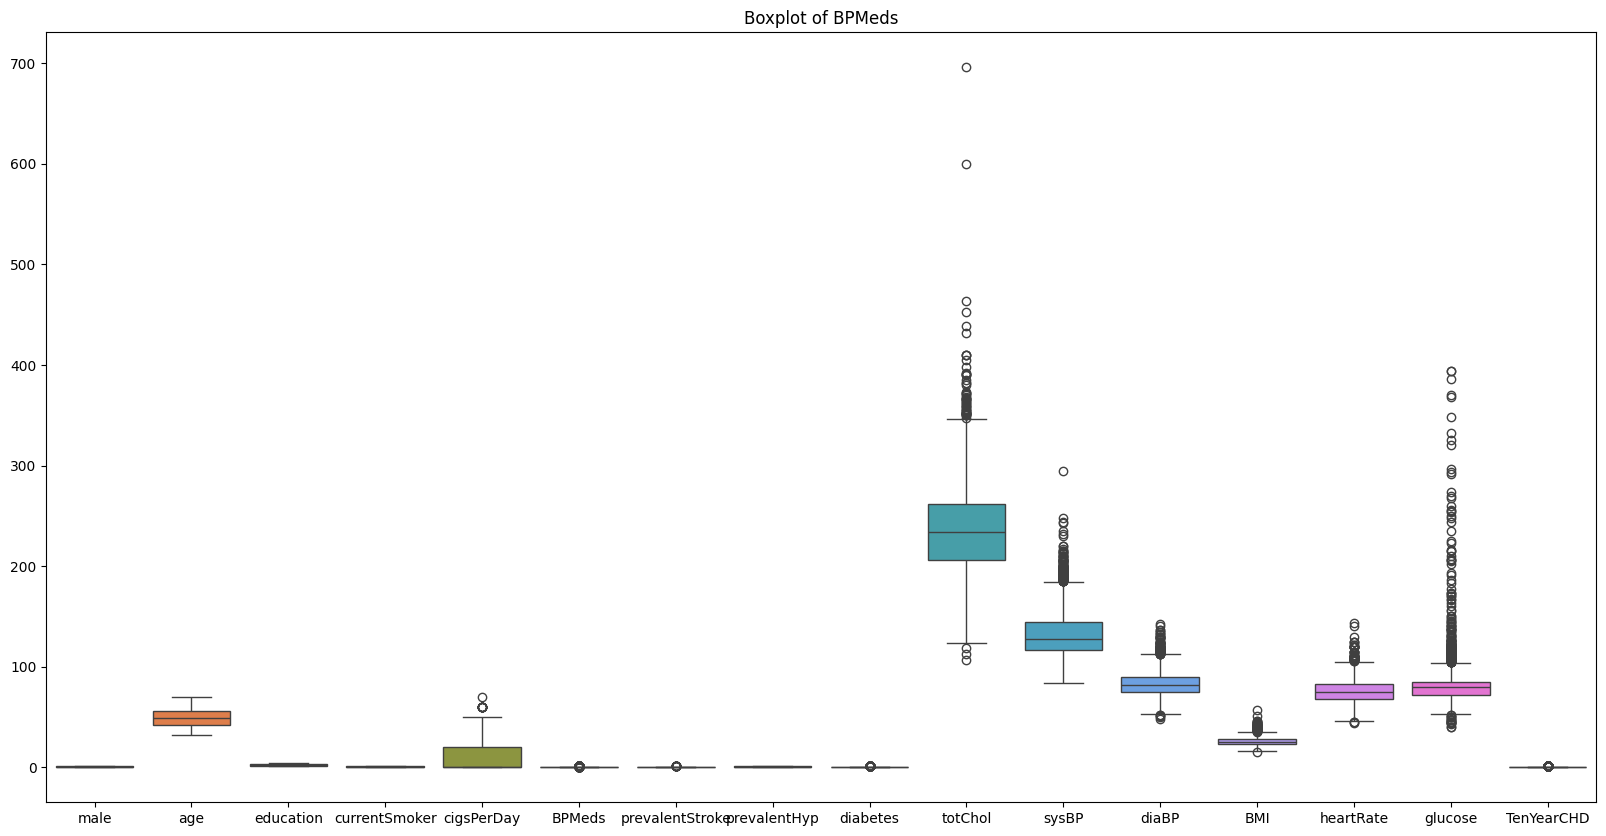

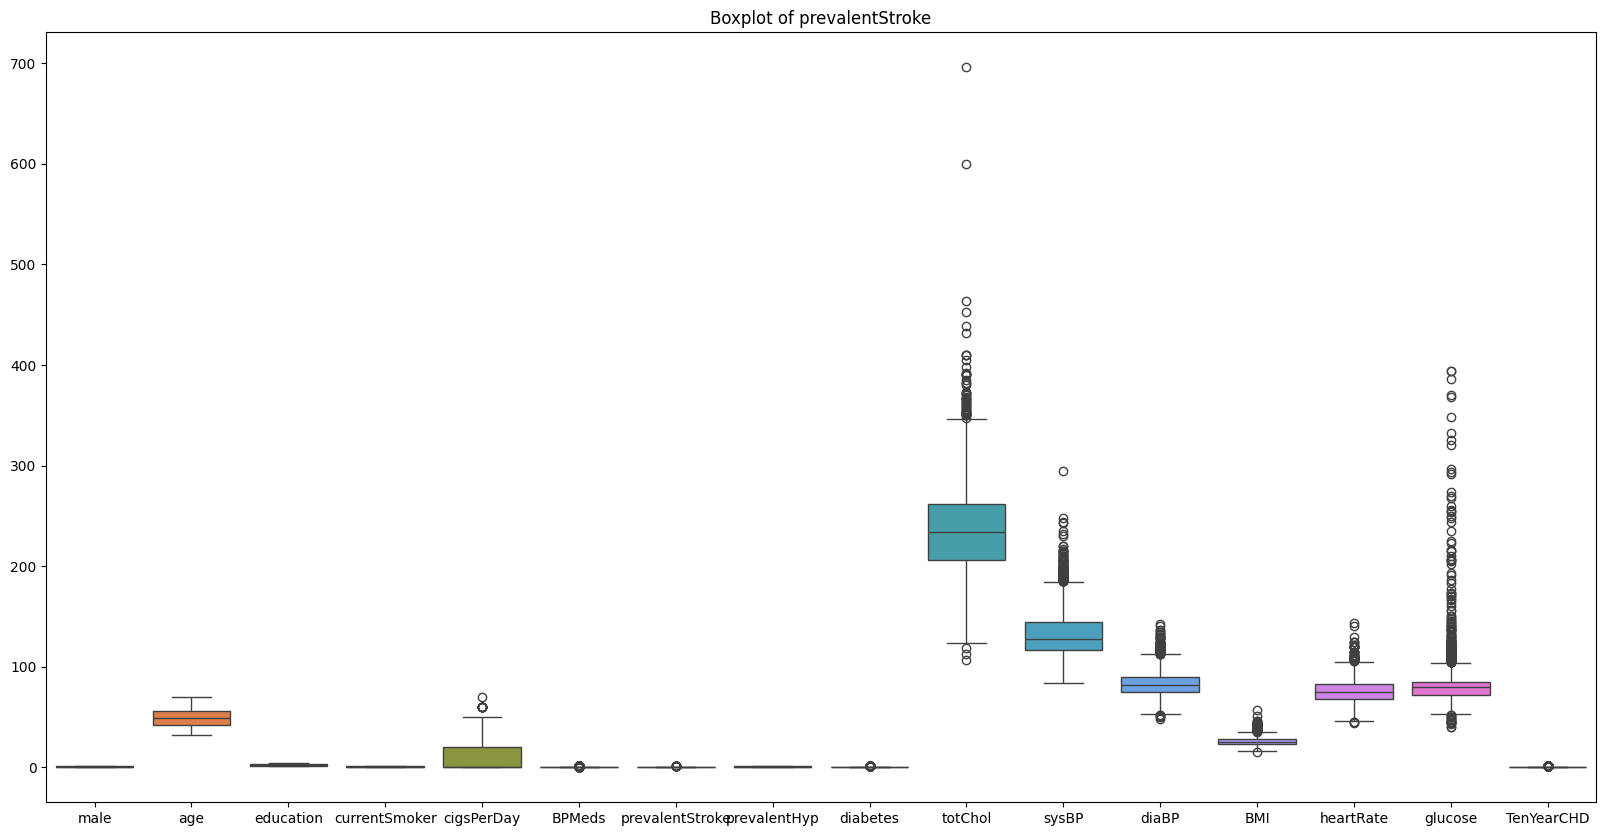

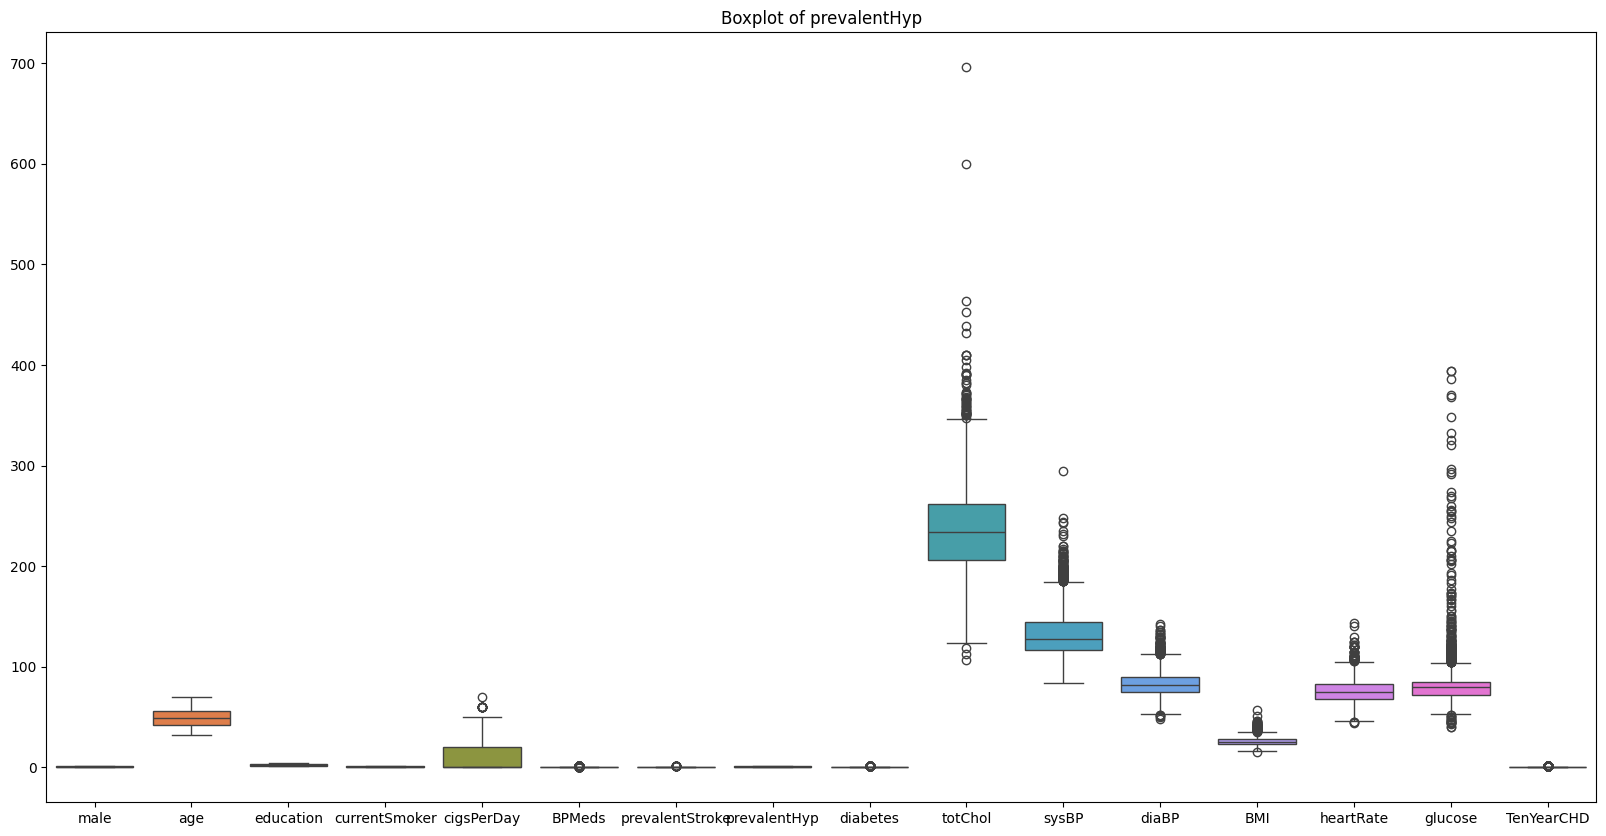

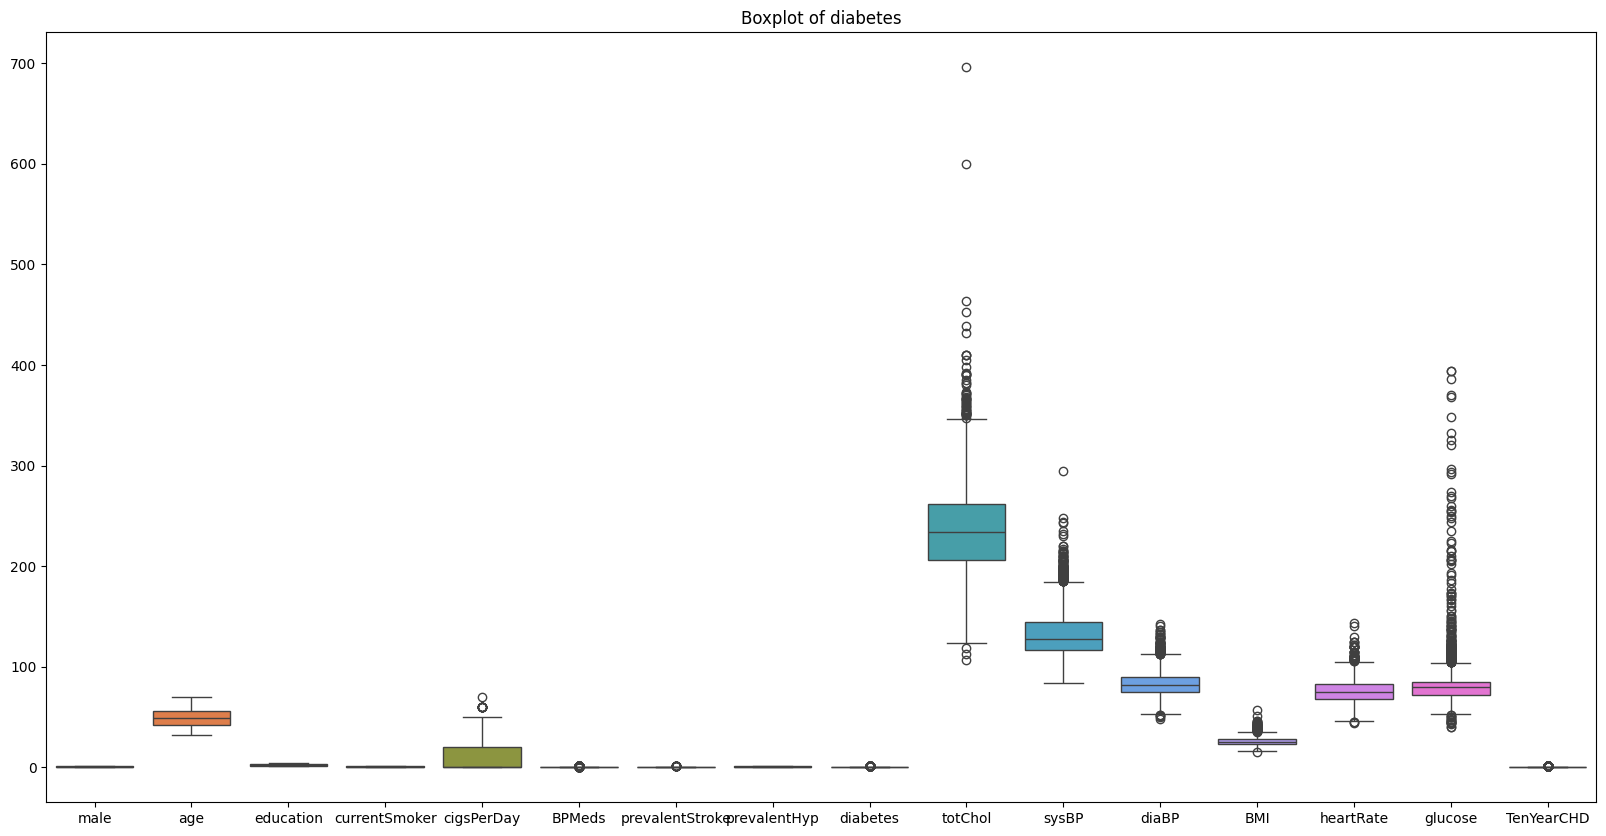

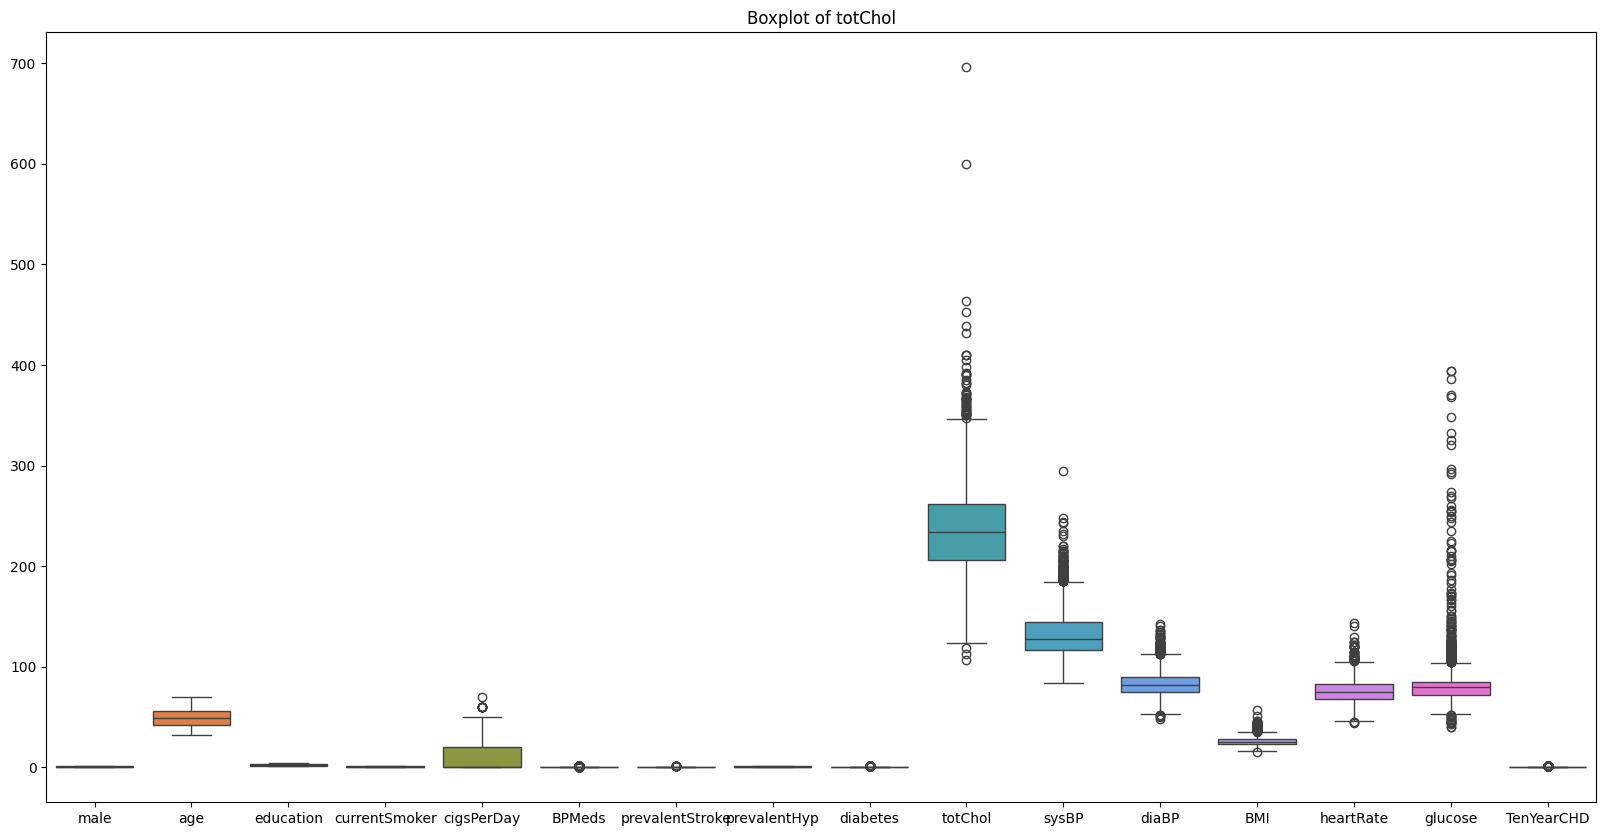

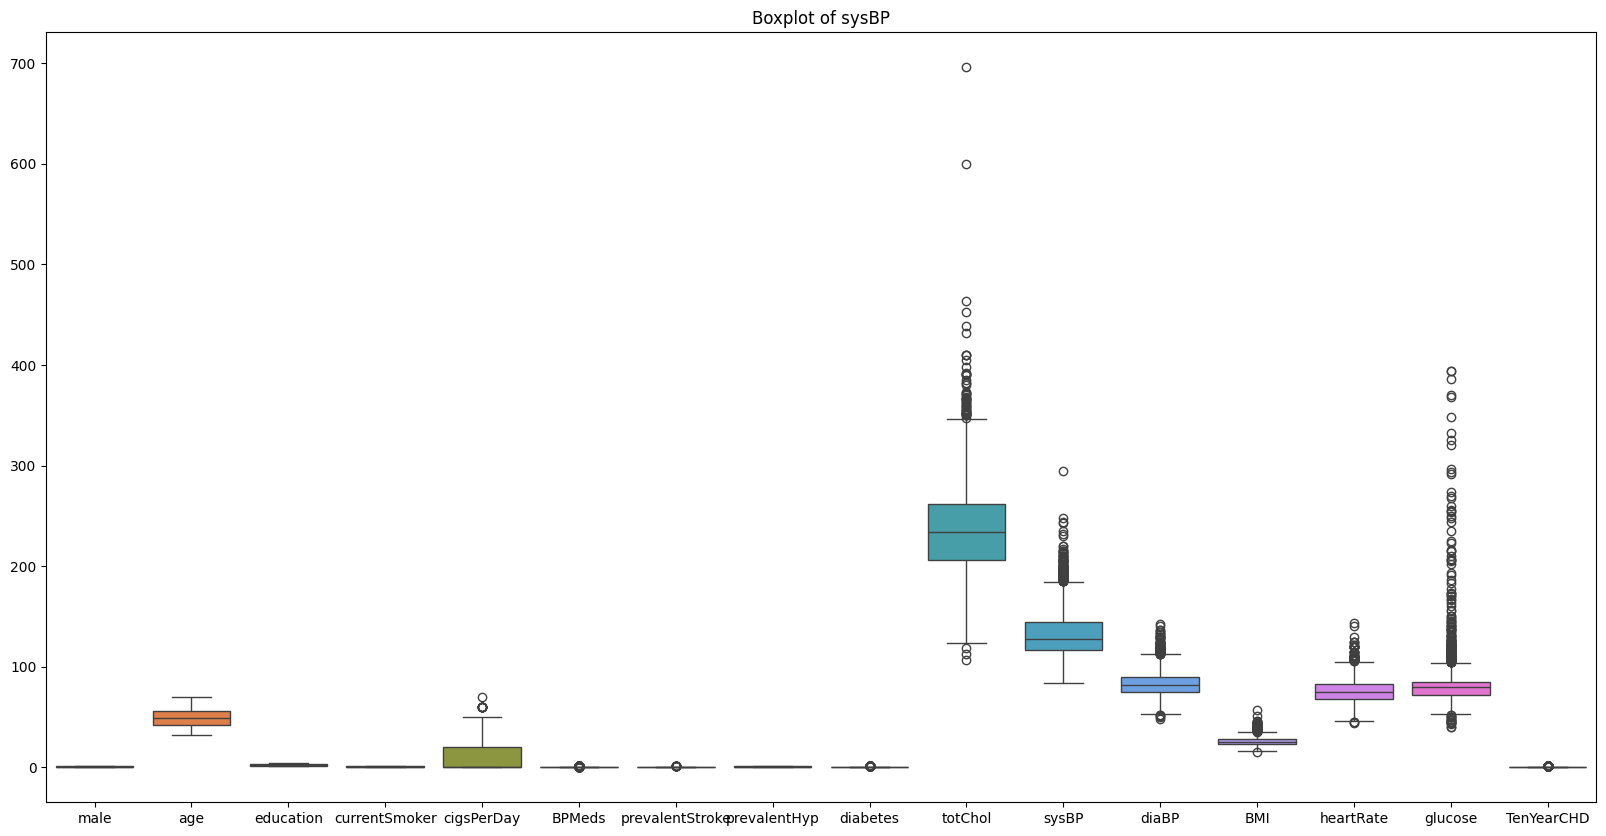

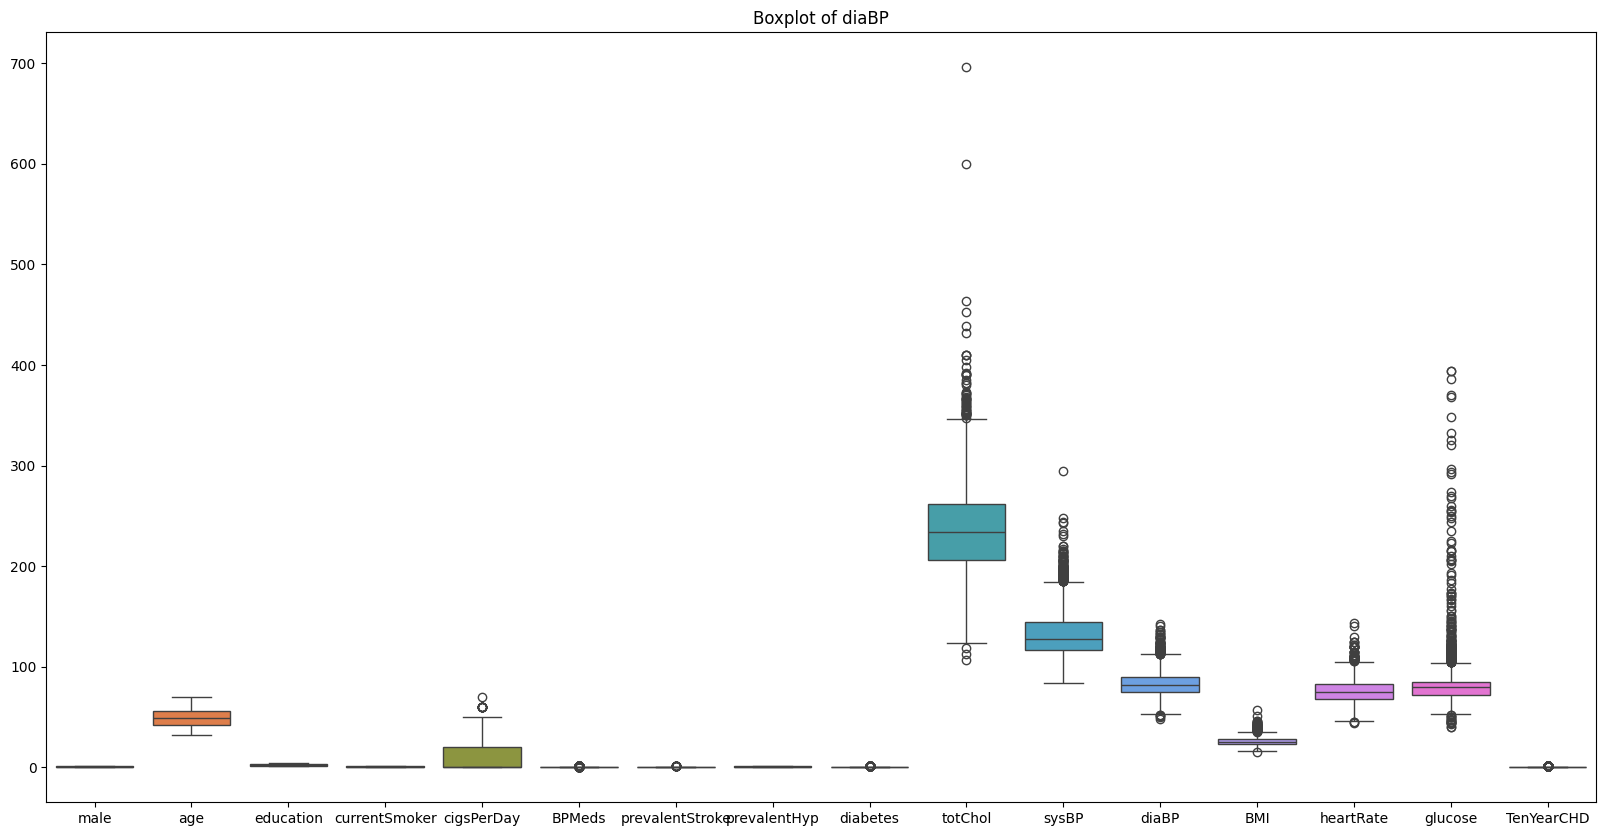

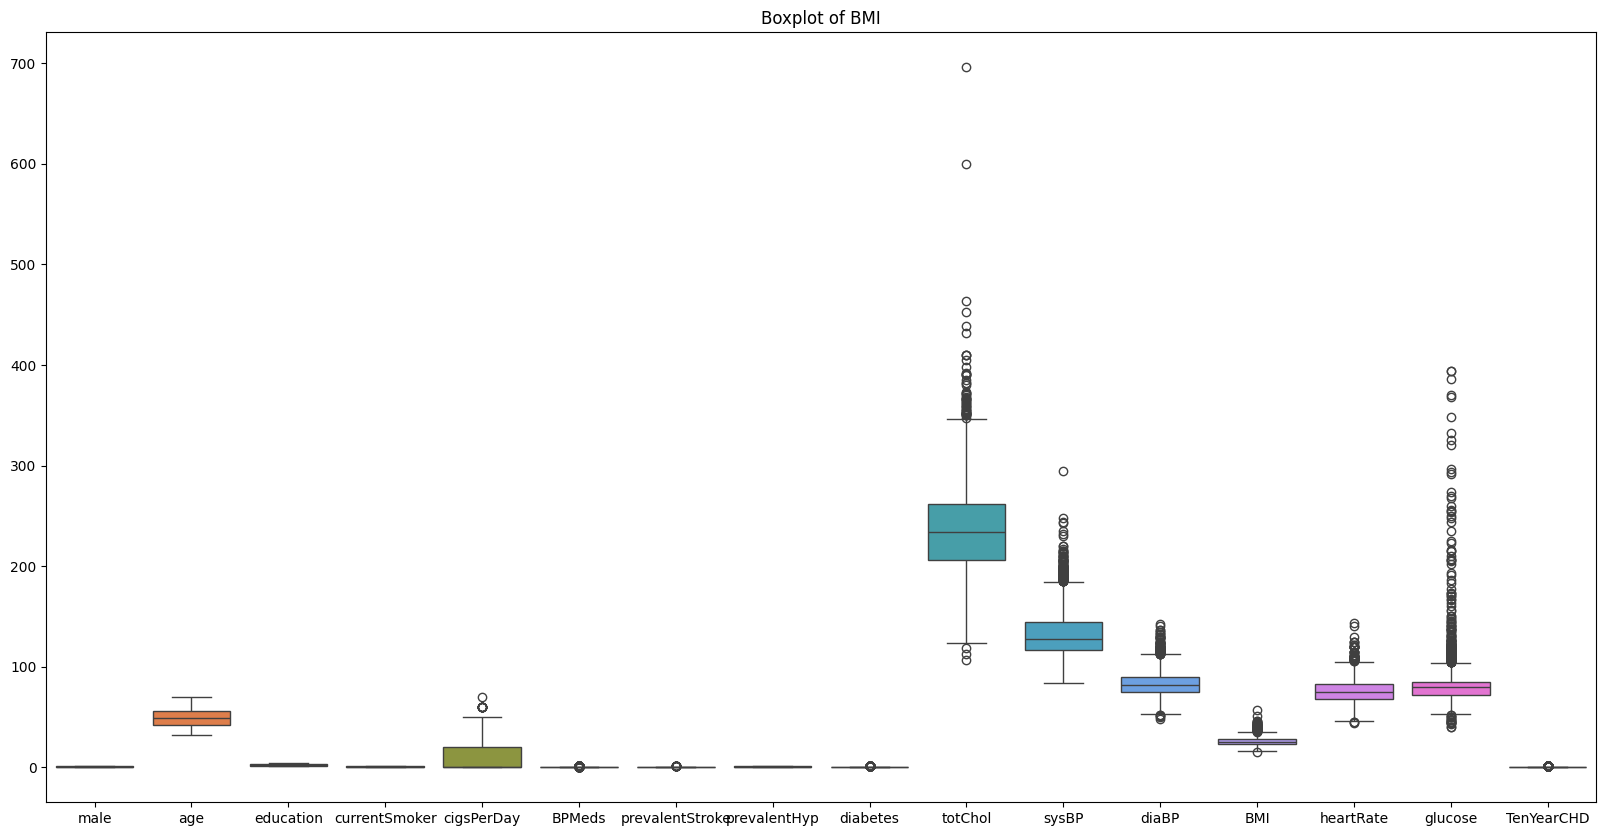

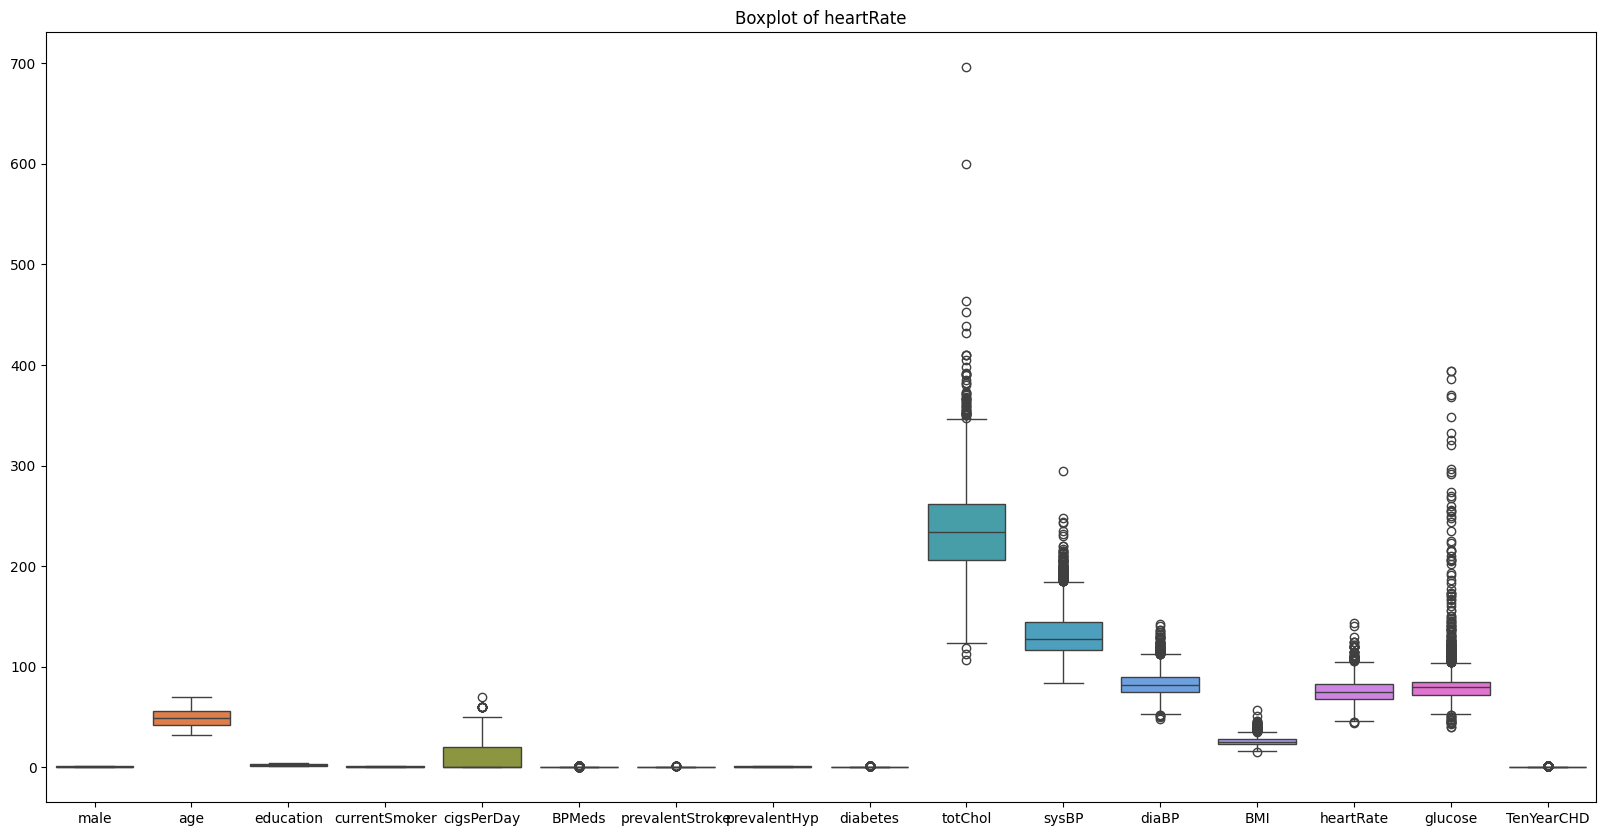

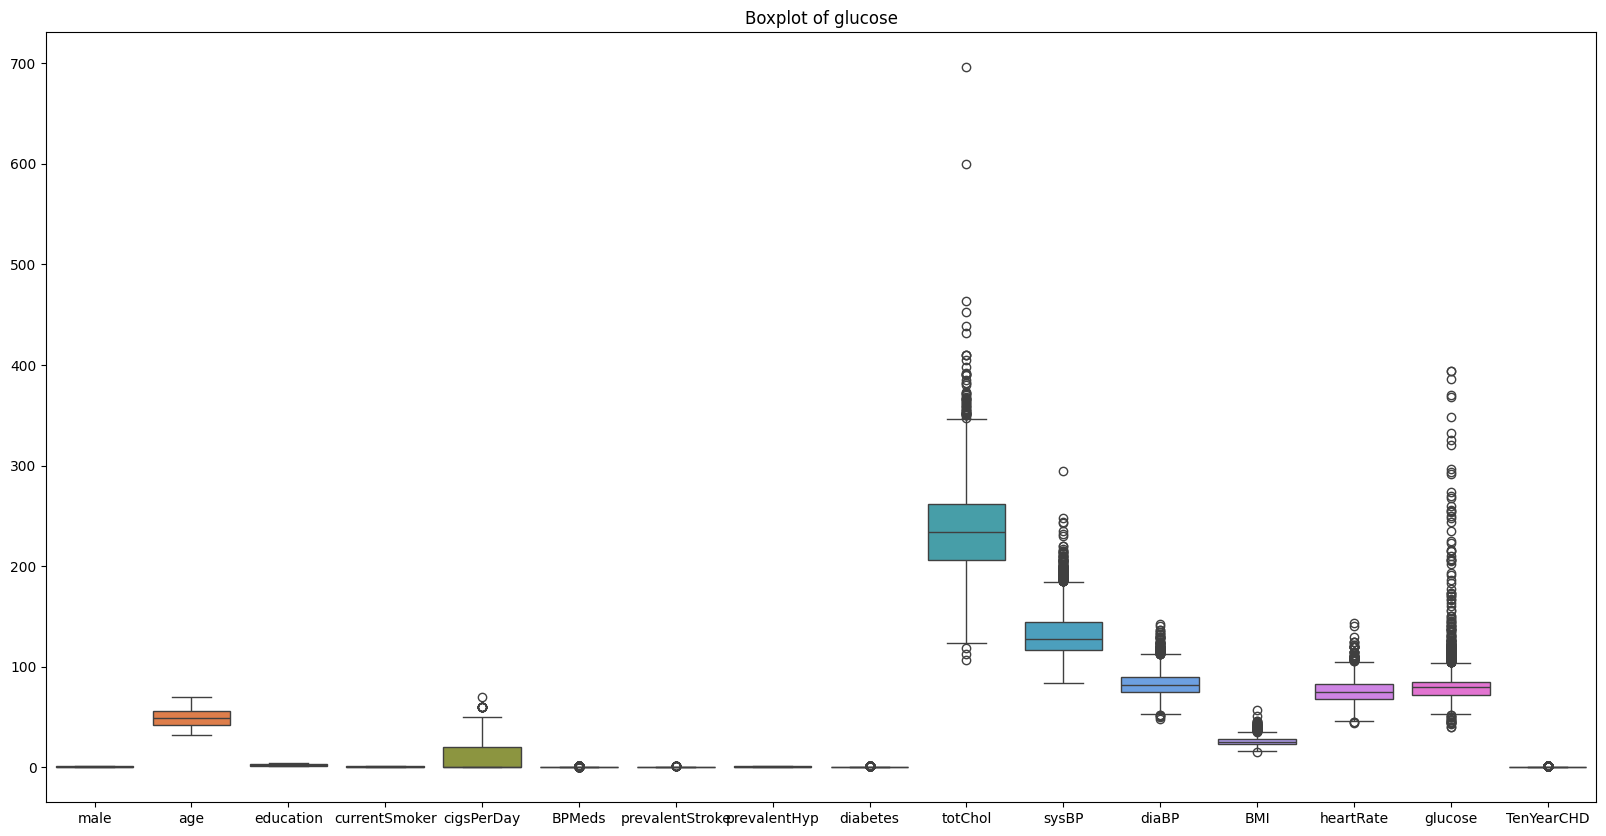

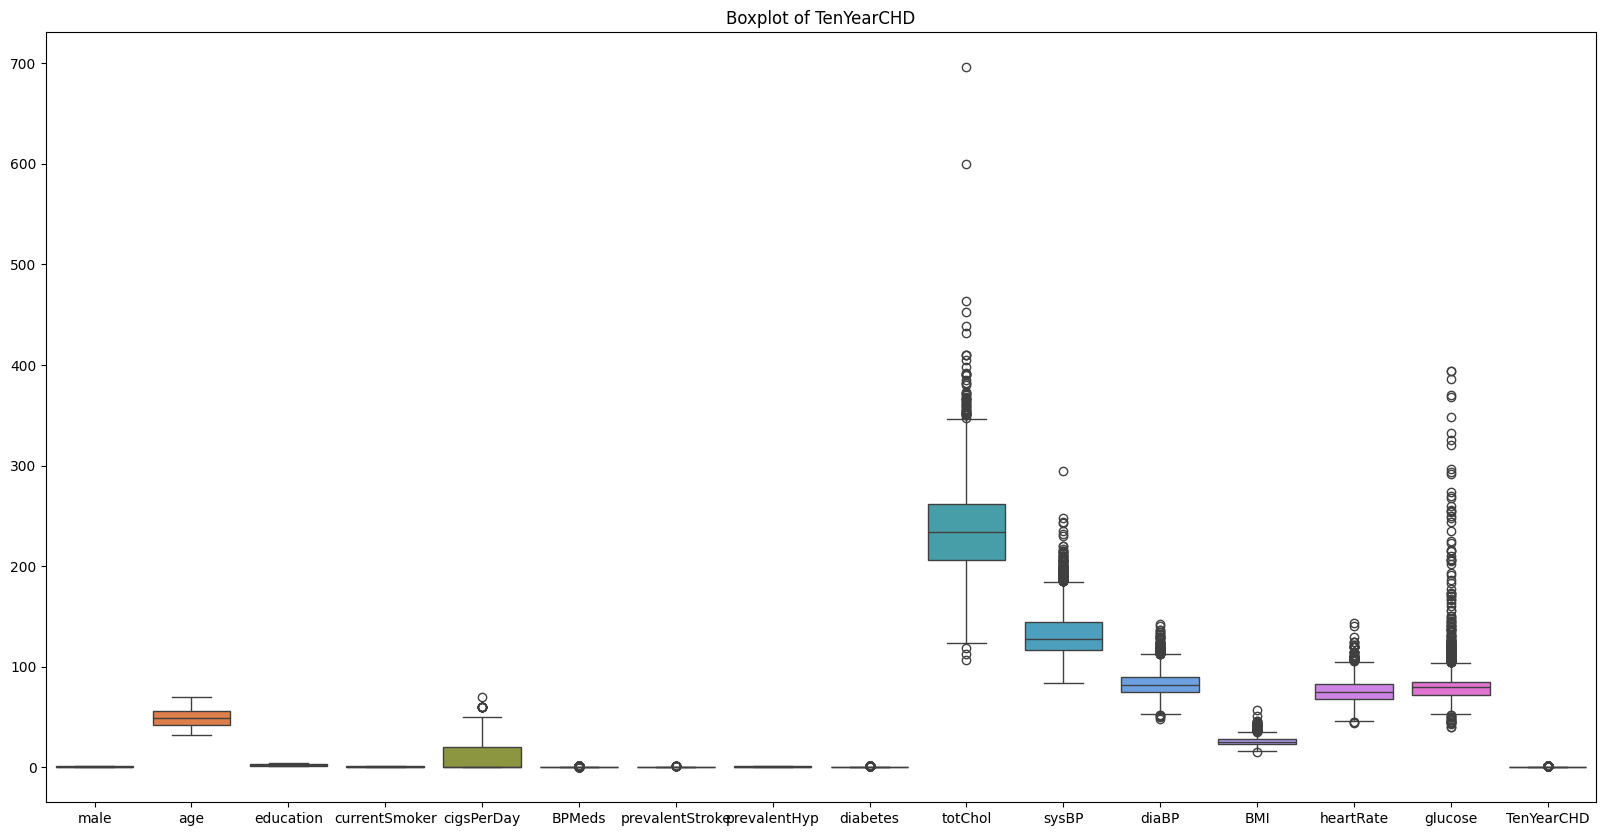

In [13]:
for col in data:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data)
    plt.title(f'Boxplot of {col}')
    plt.show()


#  Relationship Between Features

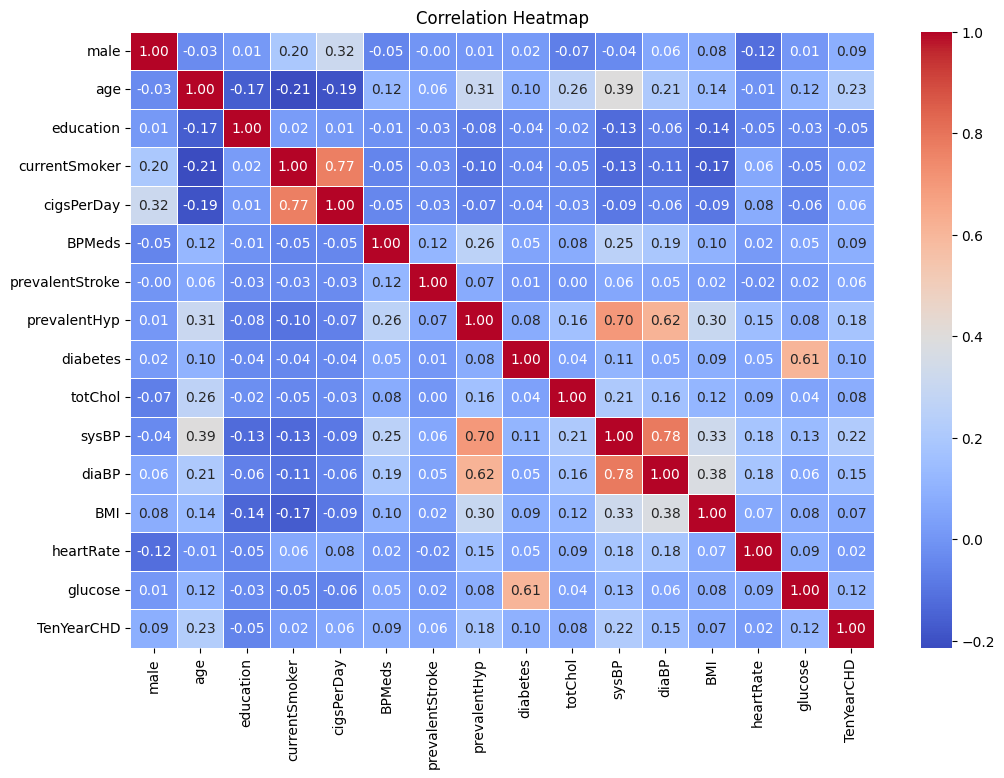

In [14]:
# Compute correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
from scipy import stats


z_scores = stats.zscore(data)
outliers = (z_scores > 3) | (z_scores < -3)
print(outliers.sum())


male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds             124
prevalentStroke     25
prevalentHyp         0
diabetes           109
totChol             25
sysBP               48
diaBP               41
BMI                 60
heartRate            0
glucose             50
TenYearCHD           0
dtype: int64


In [17]:
#  function to cap outliers based on IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


columns_with_outliers = ['BPMeds', 'prevalentStroke', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

for col in columns_with_outliers:
    data = cap_outliers(data, col)


for col in columns_with_outliers:
    print(f"{col} - Outliers remaining: {data[col].isnull().sum()}")


BPMeds - Outliers remaining: 0
prevalentStroke - Outliers remaining: 0
diabetes - Outliers remaining: 0
totChol - Outliers remaining: 0
sysBP - Outliers remaining: 0
diaBP - Outliers remaining: 0
BMI - Outliers remaining: 0
glucose - Outliers remaining: 0


In [18]:
z_scores = stats.zscore(data)
outliers = (z_scores > 3) | (z_scores < -3)
print(outliers.sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# Feature Engineering and Transformation

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = data[['age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]
y = data['TenYearCHD']
scaler =  StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,age,male,cigsPerDay,totChol,sysBP,glucose
0,-1.234283,1.153113,-0.755465,-0.974188,-1.255579,-0.245417
1,-0.417664,-0.867217,-0.755465,0.326246,-0.528850,-0.332655
2,-0.184345,1.153113,0.922240,0.208025,-0.213934,-0.856083
3,1.332233,-0.867217,1.761092,-0.264860,0.876160,2.022773
4,-0.417664,-0.867217,1.173896,1.153796,-0.092812,0.452488


In [33]:
X_scaled.isnull().sum()

,0
age,0
male,0
cigsPerDay,29
totChol,0
sysBP,0
glucose,0


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

print("Missing values in X after imputation:")
print(pd.DataFrame(X_imputed).isnull().sum())


Missing values in X after imputation:
0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (3392, 6)
Testing data shape: (848, 6)


# Train the Model

In [37]:
model = LogisticRegression(class_weight='balanced', max_iter=134000, random_state=42)


model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.6591981132075472


In [38]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.92      0.66      0.77       725
           1       0.24      0.64      0.35       123

    accuracy                           0.66       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.82      0.66      0.71       848

Confusion Matrix:
[[480 245]
 [ 44  79]]


In [39]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model again using the balanced dataset
model.fit(X_train_smote, y_train_smote)

# Evaluate the model again on the test set
y_pred_smote = model.predict(X_test)
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix after SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.92      0.66      0.76       725
           1       0.24      0.64      0.35       123

    accuracy                           0.65       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.82      0.65      0.70       848

Confusion Matrix after SMOTE:
[[476 249]
 [ 44  79]]


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)


rf_model.fit(X_train_smote, y_train_smote)


y_pred_rf = rf_model.predict(X_test)
accuracy = rf_model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

print("Random Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Classifier - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Model accuracy: 0.8160377358490566
Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       725
           1       0.30      0.20      0.24       123

    accuracy                           0.82       848
   macro avg       0.58      0.56      0.57       848
weighted avg       0.79      0.82      0.80       848

Random Forest Classifier - Confusion Matrix:
[[668  57]
 [ 99  24]]


In [45]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix


xgb_model = xgb.XGBClassifier(scale_pos_weight=10, random_state=42)  # `scale_pos_weight` helps with class imbalance


xgb_model.fit(X_train_smote, y_train_smote)


y_pred_xgb = xgb_model.predict(X_test)
accuracy = xgb_model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")


print("XGBoost Classifier - Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Classifier - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Model accuracy: 0.7346698113207547
XGBoost Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       725
           1       0.25      0.41      0.31       123

    accuracy                           0.73       848
   macro avg       0.57      0.60      0.57       848
weighted avg       0.79      0.73      0.76       848

XGBoost Classifier - Confusion Matrix:
[[573 152]
 [ 73  50]]


In [46]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'heart_disease_model.pkl')

# Print confirmation
print("Model saved successfully!")


Model saved successfully!


In [47]:
from google.colab import files

# Download the saved model file
files.download('heart_disease_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize the Flask application
app = Flask(__name__)

# Load the trained model (make sure the model file 'heart_disease_model.pkl' is in the same directory)
model = joblib.load('heart_disease_model.pkl')

# Route for health prediction
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the data from the POST request (input features)
        data = request.get_json(force=True)

        # Extract features from the data (ensure the correct order of features)
        features = np.array([[
            data['age'],
            data['Sex_male'],
            data['cigsPerDay'],
            data['totChol'],
            data['sysBP'],
            data['glucose']
        ]])

        # Predict using the trained model
        prediction = model.predict(features)

        # Return the prediction as a JSON response
        return jsonify({
            'prediction': int(prediction[0]),
            'message': 'Heart disease risk prediction'
        })

    except Exception as e:
        return jsonify({
            'error': str(e),
            'message': 'Failed to process the request'
        })

# Run the Flask application
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
